<a href="https://colab.research.google.com/github/deva285/data-analytics-dn/blob/main/powerlifting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [11]:
import pandas as pd
from tabulate import tabulate
import traceback
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import numpy as py

In [5]:
!ls -ltr /content/drive/MyDrive/dataset/dataset_csv/

total 52
dr-x------ 2 root root 4096 Feb 26  2022 dataset-titanic
dr-x------ 2 root root 4096 Feb 26  2022 dataset-powerlifting-csv
dr-x------ 2 root root 4096 Feb 26  2022 dataset_open_crime_uk
dr-x------ 2 root root 4096 Feb 26  2022 dataset-google-scholar
dr-x------ 2 root root 4096 Feb 26  2022 dataset_ebola
dr-x------ 2 root root 4096 Feb 26  2022 dataset-domestic-flights-from-1990-to-2009
dr-x------ 2 root root 4096 Feb 26  2022 dataset-covid-2
dr-x------ 2 root root 4096 Feb 26  2022 dataset-covid
dr-x------ 2 root root 4096 Feb 26  2022 dataset-airports
dr-x------ 2 root root 4096 Mar  5  2022 dataset-world-economy-worldbank
dr-x------ 2 root root 4096 Jun 21  2023 dataset-hr
dr-x------ 2 root root 4096 Nov 11  2023 dataset-forest-fire
dr-x------ 2 root root 4096 Jul 10 17:07 dataset-museum-artifacts


In [6]:
import csv
import re
import traceback
from tabulate import tabulate
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.core.interactiveshell import InteractiveShell # Capitalize 'I' in 'IPython'
InteractiveShell.ast_node_interactivity = "all"


In [7]:
df= pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-powerlifting-csv/openpowerlifting-2021-12-10-b420db66.csv")
df.head(5)

<ipython-input-7-a72fe6cde0e7>:1: DtypeWarning: Columns (33,35,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/drive/MyDrive/dataset/dataset_csv/dataset-powerlifting-csv/openpowerlifting-2021-12-10-b420db66.csv")


,Name,Sex,Event,Equipment,Age,AgeClass,BirthYearClass,Division,BodyweightKg,WeightClassKg,...,Tested,Country,State,Federation,ParentFederation,Date,MeetCountry,MeetState,MeetTown,MeetName
0,Alona Vladi,F,SBD,Raw,33.0,24-34,24-39,O,58.30,60,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
1,Galina Solovyanova,F,SBD,Raw,43.0,40-44,40-49,M1,73.10,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
2,Daniil Voronin,M,SBD,Raw,15.5,16-17,14-18,T,67.40,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
3,Aleksey Krasov,M,SBD,Raw,35.0,35-39,24-39,O,66.65,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament
4,Margarita Pleschenkova,M,SBD,Raw,26.5,24-34,24-39,O,72.45,75,...,Yes,Russia,NaN,GFP,NaN,2019-05-11,Russia,NaN,Bryansk,Open Tournament


 1. Top 10 states for Men.

In [8]:
df_state_men = df.loc[df["Sex"] == "M"].groupby(["State"]).size().to_frame("counts").reset_index()
df_state_men.head()
df1 = df_state_men.sort_values(by="counts",ascending=False)
df1.head(10)
print("Top 10 States for Men")
print(tabulate(df1.head(10), headers = 'keys', tablefmt='fancy_grid'))

,State,counts
0,AB,4184
1,ACT,95
2,AG,1
3,AK,1204
4,AKL,3


,State,counts
13,CA,32456
114,TX,23517
81,OH,11486
28,FL,11341
85,PA,10857
63,NC,10510
80,NY,9523
116,VA,9312
83,ON,9052
7,AZ,7632


Top 10 States for Men
╒═════╤═════════╤══════════╕
│     │ State   │   counts │
╞═════╪═════════╪══════════╡
│  13 │ CA      │    32456 │
├─────┼─────────┼──────────┤
│ 114 │ TX      │    23517 │
├─────┼─────────┼──────────┤
│  81 │ OH      │    11486 │
├─────┼─────────┼──────────┤
│  28 │ FL      │    11341 │
├─────┼─────────┼──────────┤
│  85 │ PA      │    10857 │
├─────┼─────────┼──────────┤
│  63 │ NC      │    10510 │
├─────┼─────────┼──────────┤
│  80 │ NY      │     9523 │
├─────┼─────────┼──────────┤
│ 116 │ VA      │     9312 │
├─────┼─────────┼──────────┤
│  83 │ ON      │     9052 │
├─────┼─────────┼──────────┤
│   7 │ AZ      │     7632 │
╘═════╧═════════╧══════════╛


2. Top 10 states for Women.

In [9]:
df_state_women = df.loc[df["Sex"] == "F"].groupby(["State"]).size().to_frame("counts").reset_index()
df_state_women.head()
df2 = df_state_women.sort_values(by="counts",ascending=False)
df2.head(10)
print("Top 10 States for Women")
print(tabulate(df2.head(10), headers = 'keys', tablefmt='pipe'))

,State,counts
0,AB,1870
1,ACT,64
2,AK,584
3,AKL,6
4,AL,1343


,State,counts
12,CA,14639
101,TX,11432
25,FL,5199
109,WI,4396
107,WA,4256
71,NY,4168
72,OH,4110
76,PA,4003
103,VA,3781
57,NC,3744


Top 10 States for Women
|     | State   |   counts |
|----:|:--------|---------:|
|  12 | CA      |    14639 |
| 101 | TX      |    11432 |
|  25 | FL      |     5199 |
| 109 | WI      |     4396 |
| 107 | WA      |     4256 |
|  71 | NY      |     4168 |
|  72 | OH      |     4110 |
|  76 | PA      |     4003 |
| 103 | VA      |     3781 |
|  57 | NC      |     3744 |


3. Plot pie chart and bar chart for Men Top 21-30 states (inclusive). (Plot one with Matplotlib and one with Seaborn)

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x780f2f74c430>,
 [Text(1.0285810515743992, 0.38989873088034466, 'OK'),
  Text(0.5291044002089731, 0.9643902393116094, 'BC'),
  Text(-0.19332417066916924, 1.0828784627256551, 'TN'),
  Text(-0.8202054181466365, 0.7329823135948789, 'OR'),
  Text(-1.0958367599591297, 0.09561273723870206, 'NM'),
  Text(-0.9470364468573443, -0.559573023227368, 'MI'),
  Text(-0.4578201092024622, -1.0002003537341135, 'AB'),
  Text(0.18016723123727343, -1.0851450450461888, 'AL'),
  Text(0.7479939832050733, -0.8065389024027352, 'IN'),
  Text(1.0608940183879818, -0.2906955138088662, 'NV')],
 [Text(0.5610442099496722, 0.21267203502564253, '11.5%'),
  Text(0.28860240011398525, 0.5260310396245141, '11.0%'),
  Text(-0.10544954763772867, 0.5906609796685391, '10.6%'),
  Text(-0.44738477353452893, 0.39980853468811567, '10.5%'),
  Text(-0.5977291417958889, 0.05215240213020112, '9.9%'),
  Text(-0.5165653346494605, -0.30522164903310983, '9.8%'),
  Text(-0.24972005956497934, -0.54556382930951

Text(0.5, 1.0, 'Top 21-30 States for Men')

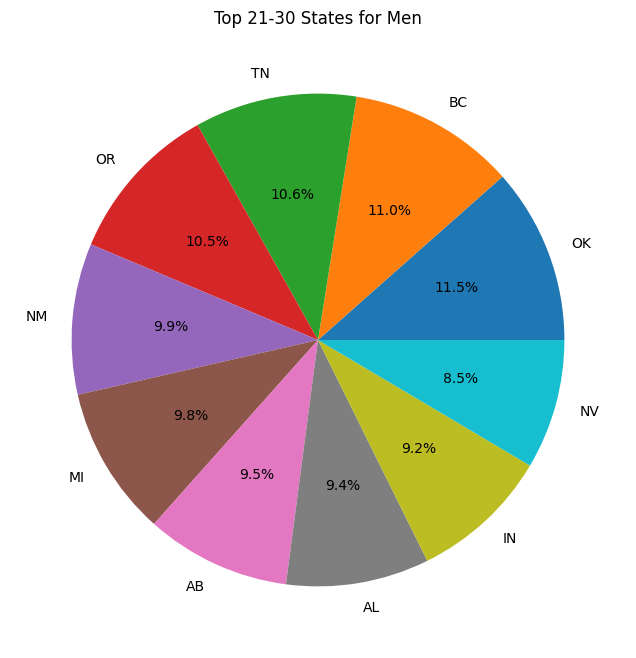

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='State'>

Text(0.5, 1.0, 'Top 21-30 States for Men')

Text(0.5, 0, 'States')

Text(0, 0.5, 'Count')

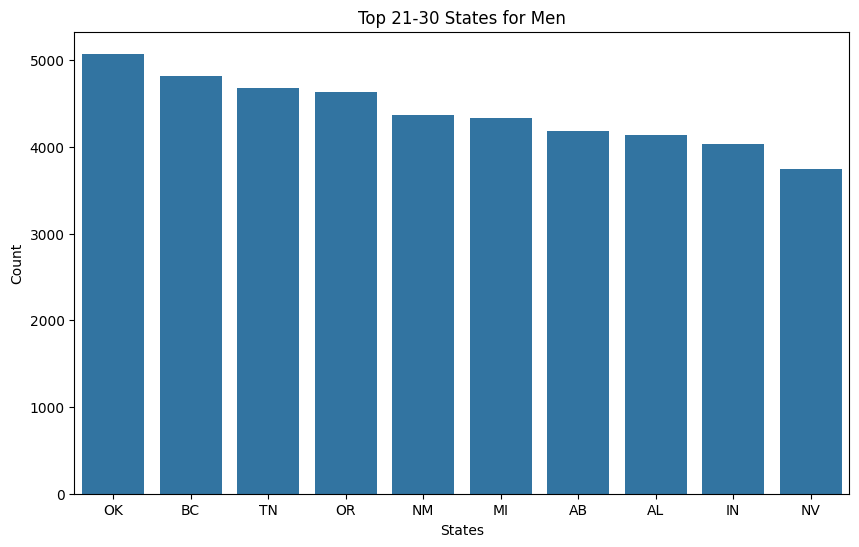

In [16]:
top_states_men = df[df['Sex'] == 'M']['State'].value_counts().iloc[20:30]
plt.figure(figsize=(8, 8))
plt.pie(top_states_men, labels=top_states_men.index, autopct='%1.1f%%')
plt.title("Top 21-30 States for Men")
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x=top_states_men.index, y=top_states_men.values)
plt.title("Top 21-30 States for Men")
plt.xlabel("States")
plt.ylabel("Count")
plt.show()

4. Plot pie chart and bar chart for Women Top 21-30 states (inclusive). (Plot one with Matplotlib and one with Seaborn)

([<matplotlib.patches.Wedge at 0x780f342a8c70>,
 [Text(1.024291041788169, 0.4010334920084703, 'IL'),
  Text(0.48140476223395345, 0.9890649396771027, 'MA'),
  Text(-0.31360907157715334, 1.0543478317066508, 'NJ'),
  Text(-0.9379581822023506, 0.5746602895969604, 'MI'),
  Text(-1.0905422671673959, -0.1439359702138302, 'AB'),
  Text(-0.8057967593771103, -0.7487934178245342, 'BC'),
  Text(-0.24856724331464355, -1.0715476310229792, 'IN'),
  Text(0.38910536960405334, -1.0288814369718666, 'HI'),
  Text(0.8508999206288718, -0.6971150013260222, 'AL'),
  Text(1.0714200730623704, -0.24911649290848825, 'OK')],
 [Text(0.5587042046117284, 0.21874554109552924, '11.9%'),
  Text(0.26258441576397457, 0.5394899670966015, '11.8%'),
  Text(-0.17105949358753816, 0.5750988172945367, '11.8%'),
  Text(-0.5116135539285548, 0.31345106705288744, '11.5%'),
  Text(-0.5948412366367613, -0.07851052920754373, '10.2%'),
  Text(-0.4395255051147874, -0.4084327733588368, '9.5%'),
  Text(-0.13558213271707828, -0.584480526012

(-1.25, 1.25, -1.25, 1.25)

Text(0.5, 1.0, 'Pie Chart For Top 21 - 30 States for Women')

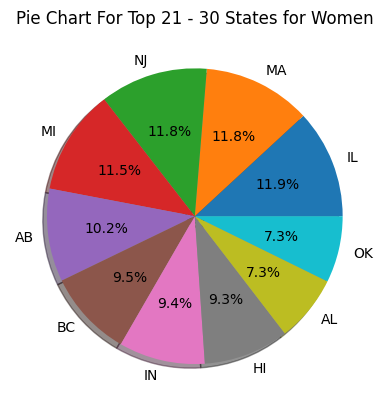

<Axes: xlabel='State', ylabel='Counts'>

Text(0.5, 1.0, 'Bar Chart For Top 21 - 30 States for Women (Seaborn)')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'IL'),
  Text(1, 0, 'MA'),
  Text(2, 0, 'NJ'),
  Text(3, 0, 'MI'),
  Text(4, 0, 'AB'),
  Text(5, 0, 'BC'),
  Text(6, 0, 'IN'),
  Text(7, 0, 'HI'),
  Text(8, 0, 'AL'),
  Text(9, 0, 'OK')])

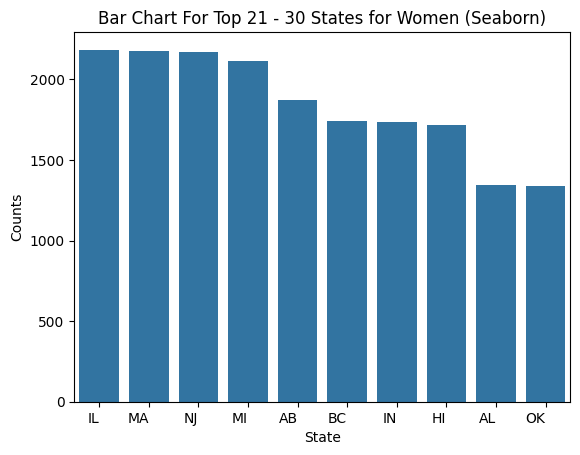

In [17]:
df_state_women = {"IL": 2184, "MA": 2174, "NJ": 2169, "MI": 2115, "AB": 1870,
                      "BC": 1744, "IN": 1733, "HI": 1717, "AL": 1343, "OK": 1337}
plt.pie(list(df_state_women.values()), labels=df_state_women.keys(), autopct='%2.1f%%', shadow=True, startangle=0)
plt.axis("on")
plt.title("Pie Chart For Top 21 - 30 States for Women")
plt.show()
df_women = pd.DataFrame(list(df_state_women.items()), columns=['State', 'Counts'])
sns.barplot(x='State', y='Counts', data=df_women)
plt.title("Bar Chart For Top 21 - 30 States for Women (Seaborn)")
plt.xticks(rotation=0, ha='right')
plt.show()


5. Top 10 States for Men in Year 2021



In [18]:
def top_10_states_by_year(df, year, sex):
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
  filtered_df = df[
      (df['Date'].dt.year == year) & (df['Sex'] == sex)
  ]
  top_states = filtered_df['State'].value_counts().nlargest(10)
  return top_states
Top_10_states_men_2021 = top_10_states_by_year(df, 2021, 'M')
print(Top_10_states_men_2021)


State
CA    3384
TX    3037
FL    1781
OH    1529
PA    1183
VA    1156
NC    1109
NY    1033
GA     935
MO     893
Name: count, dtype: int64


6. Top 10 States for Women in Year 2021

In [19]:
def top_10_states_by_year(df, year, sex):
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
  filtered_df = df[
      (df['Date'].dt.year == year) & (df['Sex'] == sex)
  ]
  top_states = filtered_df['State'].value_counts().nlargest(10)
  return top_states
Top_10_states_women_2021 = top_10_states_by_year(df, 2021, 'F')
print(Top_10_states_women_2021)

State
CA    1578
TX    1572
FL     921
OH     680
NC     635
VA     542
NY     530
PA     502
MI     478
LA     473
Name: count, dtype: int64


7. Stack bar chart for men vs women X axis -> 18-30 | 31-40 | 41-50 | 51-60

<ipython-input-23-bf5454746cc0>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_counts = df.groupby(['Sex', 'Age Group']).size().unstack(fill_value=0)


<Axes: xlabel='Sex'>

Text(0.5, 1.0, ' Stack bar chart for men vs women')

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

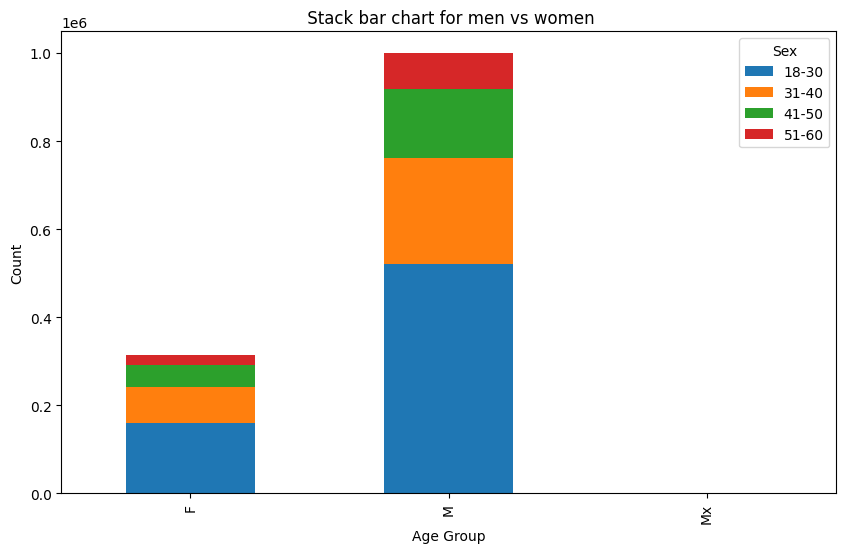

In [23]:
bins = [18, 30, 40, 50, 60]
labels = ['18-30', '31-40', '41-50', '51-60']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
age_group_counts = df.groupby(['Sex', 'Age Group']).size().unstack(fill_value=0)
age_group_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title(' Stack bar chart for men vs women')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Sex')
plt.show()


8.Pie chart for men w.r.t age group (18-30 | 31-40 | 41-50 | 51-60)

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x780f2f56d930>,
 [Text(-0.07719751529437481, 1.0972878125780743, '18-30'),
  Text(-0.6857684106873748, -0.8600707452897768, '31-40'),
  Text(0.596572357492313, -0.9241760775285541, '41-50'),
  Text(1.064644522121761, -0.27664425082789507, '51-60')],
 [Text(-0.04210773561511353, 0.5985206250425859, '52.2%'),
  Text(-0.3740554967385681, -0.4691294974307873, '24.1%'),
  Text(0.32540310408671613, -0.5040960422883022, '15.6%'),
  Text(0.5807151938845968, -0.15089686408794273, '8.1%')])

Text(0.5, 1.0, 'Men by Age Group')

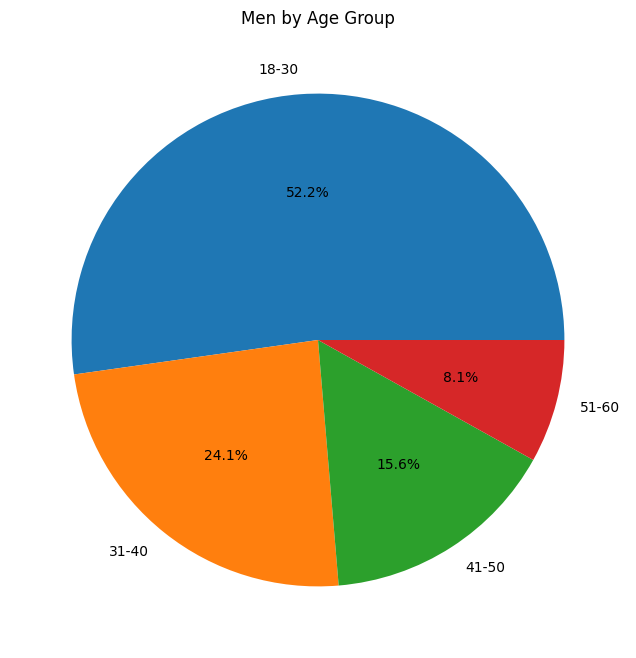

In [24]:
age_group_dist_men = df[df['Sex'] == 'M']['Age Group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_group_dist_men, labels=age_group_dist_men.index, autopct='%1.1f%%')
plt.title("Men by Age Group")
plt.show()

9.Pie chart for women w.r.t age group

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x780f2f5a3e50>,
 [Text(-0.031208818948490806, 1.0995571879715218, '18-30'),
  Text(-0.7191833943624285, -0.8323312112815041, '31-40'),
  Text(0.6206490858384113, -0.9081820920101566, '41-50'),
  Text(1.070951409887282, -0.25112363023109313, '51-60')],
 [Text(-0.017022992153722254, 0.5997584661662846, '50.9%'),
  Text(-0.39228185147041555, -0.45399884251718403, '25.5%'),
  Text(0.3385358650027697, -0.49537205018735814, '16.3%'),
  Text(0.5841553144839721, -0.13697652558059625, '7.3%')])

Text(0.5, 1.0, 'Women by Age Group')

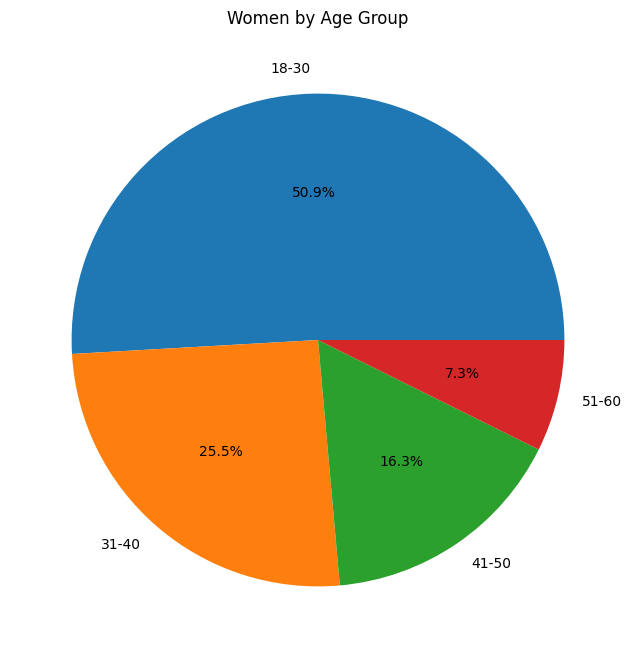

In [25]:
age_group_dist_women = df[df['Sex'] == 'F']['Age Group'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(age_group_dist_women, labels=age_group_dist_women.index, autopct='%1.1f%%')
plt.title("Women by Age Group")
plt.show()


10.Histogram for men by age  

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Histogram of Age for Men')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

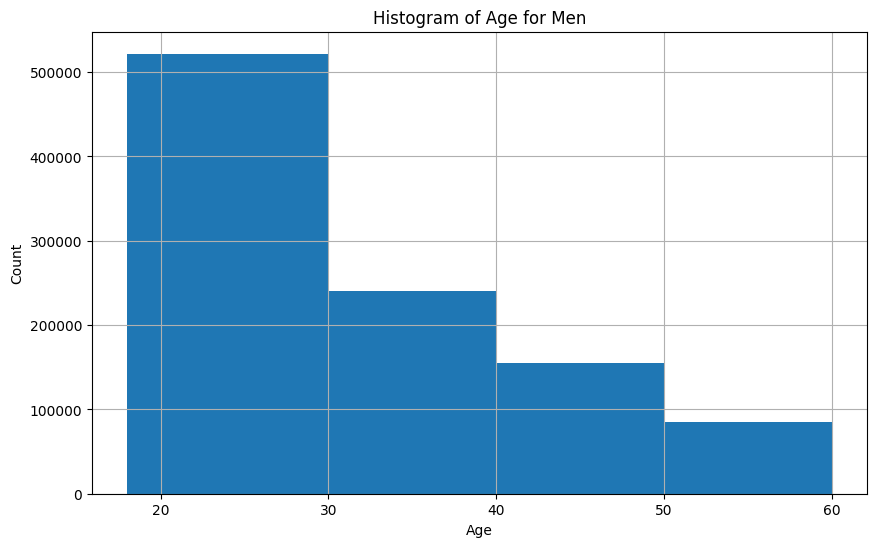

In [28]:
plt.figure(figsize=(10, 6))
df[df['Sex'] == 'M']['Age'].dropna().hist(bins=bins)
plt.title('Histogram of Age for Men')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


11.Histogram for women by age

<Figure size 1000x600 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Histogram of Age for Women')

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

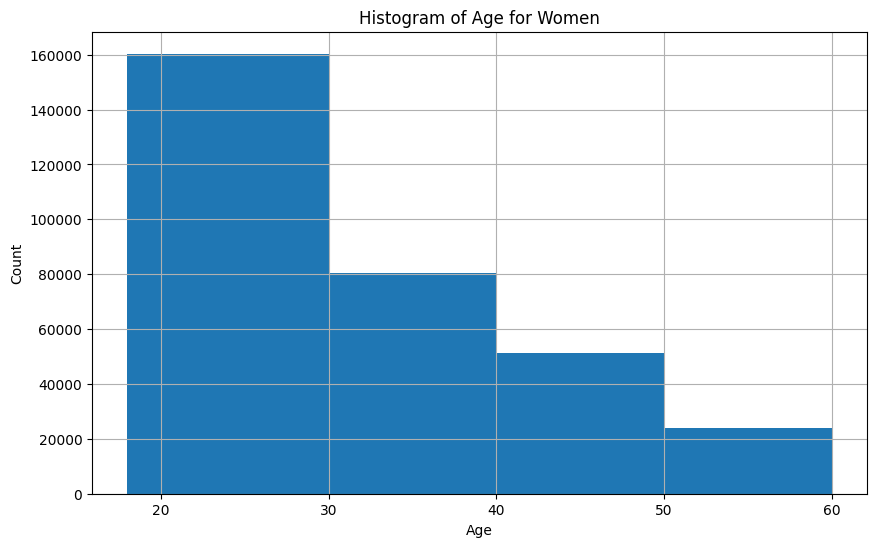

In [29]:
plt.figure(figsize=(10, 6))
df[df['Sex'] == 'F']['Age'].dropna().hist(bins=bins)
plt.title('Histogram of Age for Women')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()